In [136]:
import numpy as np

class Perceptron(object):
    """ Perceptron Classifier
    
    * Learn a model by calling the fit() method.
    * Make prediction by calling a the predict() method.
    
    Parameters
    -----------
    eta: float
        Learning rate (between 0.0 and 1.0).
    n: int
        Number of epochs for training.
    seed: int
        Seed for random number generation.
        
    Attributes
    -----------
    w_: 1d array
        Feature weights.
    errors_: list
        Number of misclassifications in each epoch.
    """
    def __init__(self, eta=0.01, n=100, seed=10):
        self.eta  = eta
        self.n    = n
        self.seed = seed
        
    def fit(self, X, y):
        """ Fit training data
        
        Learn a model based on the given feature matrix and outputs
        vector.
        
        Parameters
        -----------
        X: {array-like}, shape = [n_examples, n_features]
            Feature matrix of size examples x features.
        y: {array-like}, shape = [n_examples]
            Target values for each example.
            
        Returns
        --------
        self: object
        """
        rg = np.random.default_rng(self.seed)
        self.w_ = rg.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[0]  += update
                self.w_[1:] += update * xi
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def predict(self, x):
        """ Apply step functin to net input """
        return np.where(self.net_input(x) >= 0.0, 1, -1)
        
    def net_input(self, x):
        """ Calculate w^t * x """
        return np.dot(x, self.w_[1:]) + self.w_[0]

[]

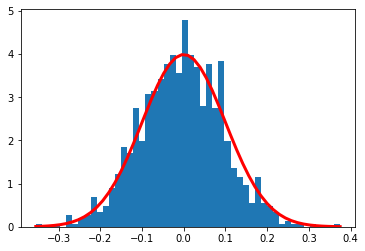

In [137]:
import matplotlib.pyplot as plt

random_seed = 1
mu = 0.0     # Average.
sigma = 0.1  # Standard deviation.

# Draw 'size' number of samples from a Gaussian distribution.
rg = np.random.default_rng(random_seed)
x = rg.normal(loc=mu, scale=sigma, size=1000)

# Bin the data such that the result 'count' is normalized to form a probability density
# (the area under the probability density will be 1).
count, bins, _ = plt.hist(x, bins=50, density=True)

# Plot the bins and the expression for the probability density function of Gaussian dsitribution.
plt.plot(
    bins,
    1/(sigma * np.sqrt(2*np.pi)) * np.exp( -(bins-mu)**2 / (2*sigma**2) ),
    linewidth=3, color='r')
plt.plot()

In [138]:
import os
import pandas as pd

s = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(s, header=None, encoding="utf-8")

df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [139]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [140]:
# We will extract the first 100 samples which correspond to iris-setosa and iris-versicolor.
# We will also convert the class labels into integers: 1 for versicolor and -1 for setosa.

y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

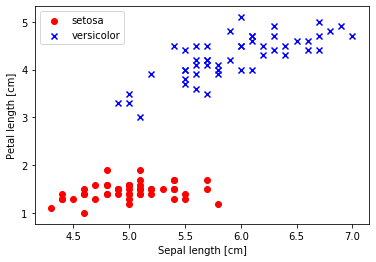

In [141]:
# We will only use the sepal length and petal length as features.
X = df.iloc[0:100, [0,2]].values

plt.scatter(X[:50, 0], X[:50, 1], color="red", marker='o', label="setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker='x', label="versicolor")

plt.xlabel("Sepal length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend()
plt.show()

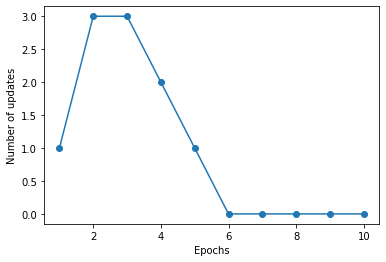

In [142]:
perceptron = Perceptron(eta=0.1, n=10, seed=10)
perceptron.fit(X, y)

plt.plot(range(1, len(perceptron.errors_)+1), perceptron.errors_, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Number of updates")
plt.show()

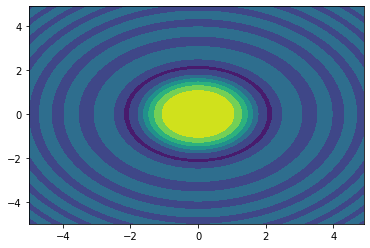

In [143]:
# A useful utility function to evaluate functions on a grid is np.meshgrid.
# https://numpy.org/doc/1.18/reference/generated/numpy.meshgrid.html
#
# This function will generate "coordinate matrices"
# (a collection of coordinate vectors that describe a position in terms of the x_example and y_example basis).
x_example = np.arange(-5, 5, 0.1)
y_example = np.arange(-5, 5, 0.1)

xx_example, yy_example = np.meshgrid(x_example, y_example)

z_example = np.sin(xx_example**2 + yy_example**2) / (xx_example**2 + yy_example**2)
h = plt.contourf(x_example, y_example, z_example)
plt.show()

In [144]:
x_example = np.arange(0, 5, 1)
y_example = np.arange(0, 12, 2)

xx_example, yy_example = np.meshgrid(x_example, y_example)

print(x_example)   # 1 x 5 matrix
print(y_example)   # 1 x 6 matrix
print(xx_example)  # 6 x 5 matrix: steps in the x dimension for each y position.
print(yy_example)  # 5 x 6 matrix: steps in the y dimension for each x position.

[0 1 2 3 4]
[ 0  2  4  6  8 10]
[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[ 0  0  0  0  0]
 [ 2  2  2  2  2]
 [ 4  4  4  4  4]
 [ 6  6  6  6  6]
 [ 8  8  8  8  8]
 [10 10 10 10 10]]


In [147]:
temp = xx_example.ravel()
print(temp)
print(temp.shape)

[0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4]
(30,)


In [148]:
temp = yy_example.ravel()
print(temp)
print(temp.shape)

[ 0  0  0  0  0  2  2  2  2  2  4  4  4  4  4  6  6  6  6  6  8  8  8  8
  8 10 10 10 10 10]
(30,)


In [149]:
temp = np.array([xx_example.ravel(), yy_example.ravel()])
print(temp)
print(temp.shape)

[[ 0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  1  2  3
   4  0  1  2  3  4]
 [ 0  0  0  0  0  2  2  2  2  2  4  4  4  4  4  6  6  6  6  6  8  8  8  8
   8 10 10 10 10 10]]
(2, 30)


In [150]:
temp = np.array([xx_example.ravel(), yy_example.ravel()]).T
print(temp)
print(temp.shape)

[[ 0  0]
 [ 1  0]
 [ 2  0]
 [ 3  0]
 [ 4  0]
 [ 0  2]
 [ 1  2]
 [ 2  2]
 [ 3  2]
 [ 4  2]
 [ 0  4]
 [ 1  4]
 [ 2  4]
 [ 3  4]
 [ 4  4]
 [ 0  6]
 [ 1  6]
 [ 2  6]
 [ 3  6]
 [ 4  6]
 [ 0  8]
 [ 1  8]
 [ 2  8]
 [ 3  8]
 [ 4  8]
 [ 0 10]
 [ 1 10]
 [ 2 10]
 [ 3 10]
 [ 4 10]]
(30, 2)


In [155]:
# Calculate the minimum and maximum values for feature 1.
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1

# Calculate the minimum and maximum values for feature 2. 
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Meshgrids takes as input multiple 1d arrays, each representing positions along a dimension.
resolution = 0.02
xx1, xx2 = np.meshgrid(
    np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution),
    indexing="ij")
    
Z = perceptron.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
print(Z.shape)

Z = Z.reshape(xx1.shape)
print(Z.shape)
print(xx1.shape)

(71675,)
(235, 305)
(235, 305)


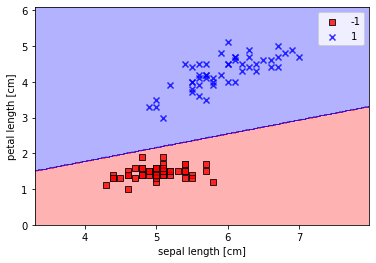

In [156]:
from matplotlib.colors import ListedColormap

markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])
    
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

# plot class examples
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], 
                y=X[y == cl, 1],
                alpha=0.8, 
                c=colors[idx],
                marker=markers[idx], 
                label=cl, 
                edgecolor="black")
    
plt.xlabel("sepal length [cm]")
plt.ylabel("petal length [cm]")
plt.legend()

plt.show()